# Introduction to data mining with the tips dataset

- Romain Billot 
- Yannis Haralambous 
- Philippe Lenca 
- Sorin Moga

---
Lab 1: Important issues illustrated from a case study
- Data and Objective understanding
- Descriptive statistics
- Visualisation tools
- Regression
---

## Data and objective understanding

–The Tips dataset– Food server’s tips in restaurants may be influenced by many factors (e.g. the
nature and location of the restaurant, the size of the party, the table location and the day of the week. . . ).
Restaurant managers need to know which factors matter when they assign tables to food servers. Indeed,
for the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component
of pay.
In one restaurant, a food server recorded some data on all customers they served during an interval
of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part
of a national chain and served a varied menu. In observance of local law the restaurant offered seating
in a non-smoking section to patrons who requested it. Each record includes a day and time, and thus
taken together, they show the server’s work schedule. The food server provided a comma-separated-value
file tips.csv containing 244 records, described by 7 variables ( total bill, tip, sex, smoker, day, time
and size).

In [1]:
# import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy as sp

### Question 1

What do you know from the text above and what information is missing?

---
We can say that our problem is about supervised learning, because we have a target function which is the tip provided bu customers to servers. The other attributes are the dependent variables(features).

---

### Question 2

Do you have some idea about the objectives of the study and the knowledge you could extract from the data? Could you suggest a list of questions of interest?

Here we want to know the influence of total bill, sex, smoker, day, time and size on tip by finding a model that can generalise the data.  

Some questions : 

    - What factors can most influence the tip value ?
    - Which factors matter when managers assign tables to food servers ?
  

### Question 3

 Load the dataset and have a look at it using the describe() function. Describe the data (the format of the data, the quantity of data –number of example/ records and variable/fields–). What are the expected values and role of each variable?

In [2]:
# the code below loads the data for you
data_tips=pd.read_csv('tips.csv')
# you can run the below code to see the first five observations 
data_tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# this function should return a tuple of 3 values: the class of your dataset object, the shape of the datasets and the columns names
def answer_3():
    # write your code here:
    # the type of the object data_tips 
    dataset_type=type(data_tips)
    # the shape of data 
    shape=data_tips.shape
    #variables in data
    col_names=data_tips.columns
   
    return dataset_type,shape,col_names
    
answer_3()

(pandas.core.frame.DataFrame,
 (244, 7),
 Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object'))

In [4]:
# a description for each variable :
# 'total_bill' : total to pay 
#'tip' : the tip value
#'sex' : the gender of the customer
#'smoker' :  customer smokes or not
#'day' : 4 days ( from thursday to sunday)
#'time' : either dinner or lunch
#'size' : the size of the party

### Question 4

Tip is usually referred to by percentage points, or as a rate. This enables a normalization over the total bill and a comparison of values across other variables. The question is now to create a "tip rate" variable and to add it to the original dataset.

In [5]:
#This function should return a dataframe including the new variable tip_rate
def answer_4():
    # write your code here
    data_tips['tip_rate']=data_tips['tip']/data_tips['total_bill']

    return data_tips
answer_4().head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


##### Home work

Explore the notion of scale of measurement. Provide a short note with meaningful definitions
and examples. Explain why it is important to consider the right scale for each variable.
What is the scale for each of the eight variables?

you can visit the link below to explore the notion of scale measurement:
http://stattrek.com/statistics/measurement-scales.aspx?Tutorial=AP

## Descriptive statistics and visualisation

### Question 5

Explore univariate summaries with the describe() function.

In [6]:
#This function should return summary about numerical and categorical features
# use the output of answer4() for your this question
def answer_5():
    # write your code here:
    num_des=answer_4().describe()
    cate_des=answer_4().describe(include=['object'])
    return num_des,cate_des
answer_5()

(       total_bill         tip        size    tip_rate
 count  244.000000  244.000000  244.000000  244.000000
 mean    19.785943    2.998279    2.569672    0.160803
 std      8.902412    1.383638    0.951100    0.061072
 min      3.070000    1.000000    1.000000    0.035638
 25%     13.347500    2.000000    2.000000    0.129127
 50%     17.795000    2.900000    2.000000    0.154770
 75%     24.127500    3.562500    3.000000    0.191475
 max     50.810000   10.000000    6.000000    0.710345,
          sex smoker  day    time
 count    244    244  244     244
 unique     2      2    4       2
 top     Male     No  Sat  Dinner
 freq     157    151   87     176)

### Question 6

Plot a representation of the days distribution in the dataset and comment.

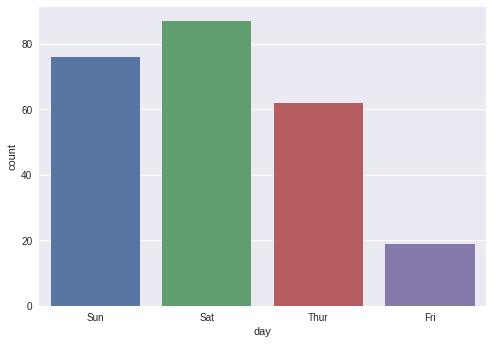

In [7]:
# this function should return a plot of the days distribution, give a comment below your plot
def answer_6():
    # write your code here
    return sns.countplot(x='day',data=data_tips)
answer_6()     

let your comment here:

### Question 7

Prepare a plot of the amount of tips against the total bill. What can you see ? Test the correlation
between the two variables.

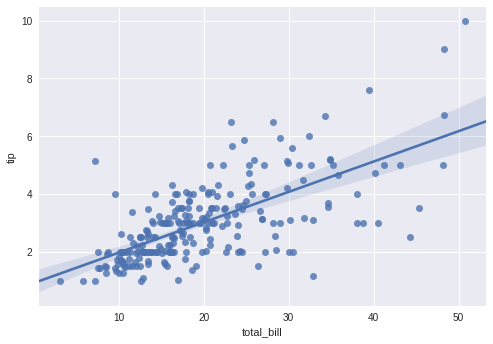

In [8]:
# this function should return a plot of tips against the total_bill
def answer_7(): 
    # write your code here
    ax = sns.regplot(x="total_bill", y="tip", data=data_tips)
    return ax
answer_7()

We can say that  tip correlate strongly with the total_bill. As shown above we can draw a line that can approximate the relationship between them.


### Question 8

Draw and interpret three boxplots : 

    1. the distribution of the total bill,
    2. the distribution of tips;
    3. the distributions of tips vs. days.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fed0490f710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fecfef47e10>)

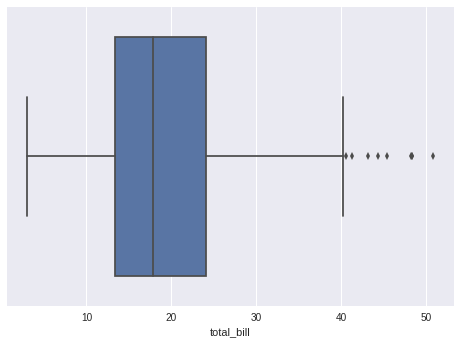

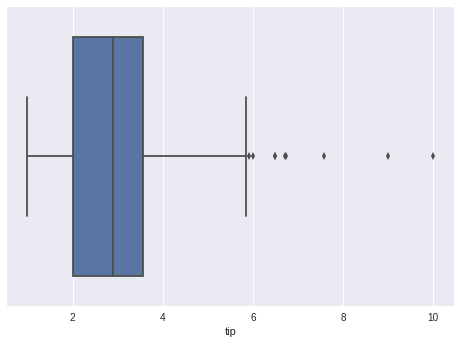

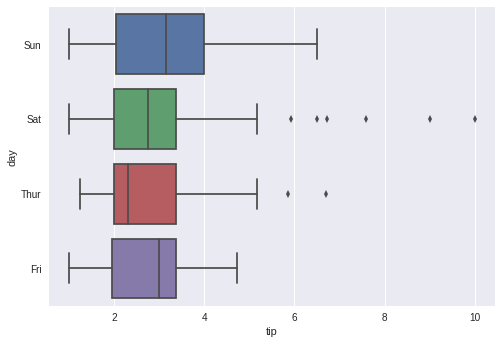

In [9]:
def answer_8():
    # write your code here
    plt.figure()
    boxplot_total_bill = sns.boxplot(x= 'total_bill',data=data_tips)
    plt.figure()
    boxplot_tip =sns.boxplot(x= 'tip',data=data_tips)
    plt.figure()
    boxplot_tip_vs_day = sns.boxplot(x= 'tip',y='day',data=data_tips)
    return boxplot_total_bill,boxplot_tip,boxplot_tip_vs_day
answer_8()

In [10]:
# to interpret:  firstly, there outliers ( black points in the boxplots) ...

### Question 9

Draw an histogram of tips. What can you say about the shape of the data ? Is this restaurant
expensive ?  plot 6 histograms
with increasing numbers of breaks.

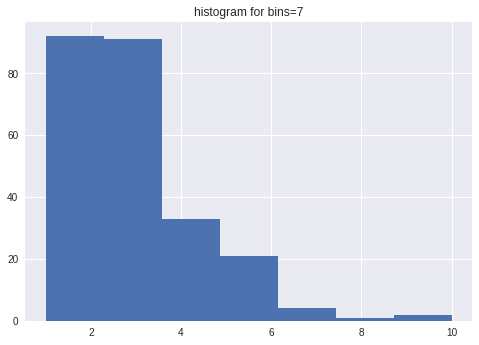

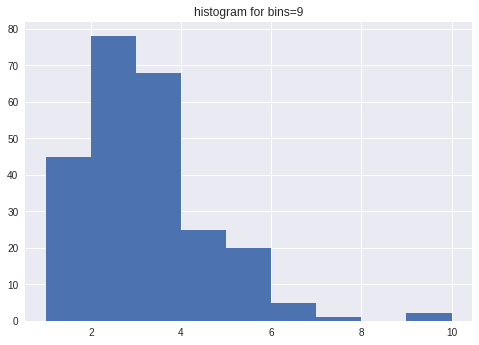

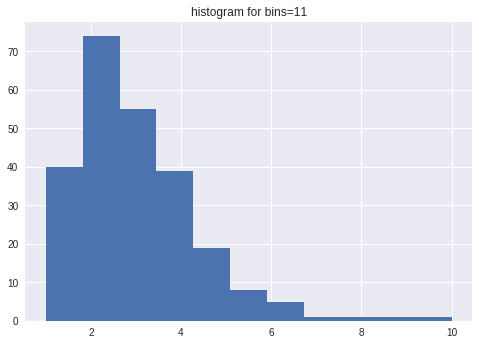

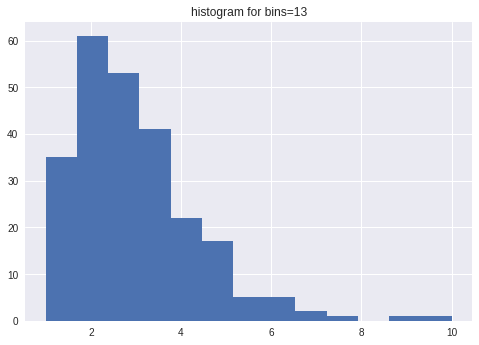

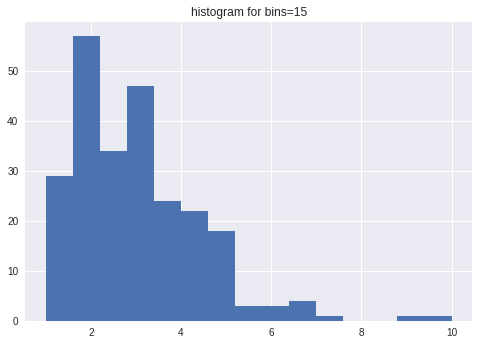

In [11]:
def answer_9():
    # write your code here
    #plt.subplot(nrows=2,ncols=3)
    for i in range(7,17,2):
        plt.figure()
        plt.hist(x='tip',data=data_tips,bins=i)
        plt.title('histogram for bins='+str(i))
answer_9()

### Question 11

Display the counts (proportions) for Gender of the Bill Payer and Smoking Parties. Do the same
for time of the day (dinner or lunch) and day of the week

(<matplotlib.axes._subplots.AxesSubplot at 0x7fecfec64208>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fecfeb28f98>)

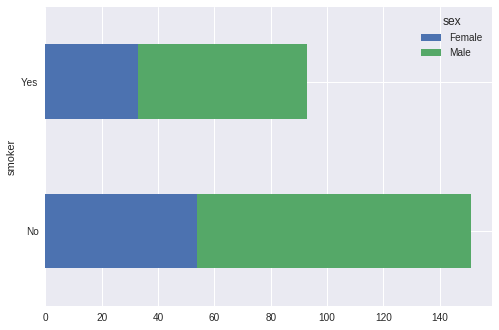

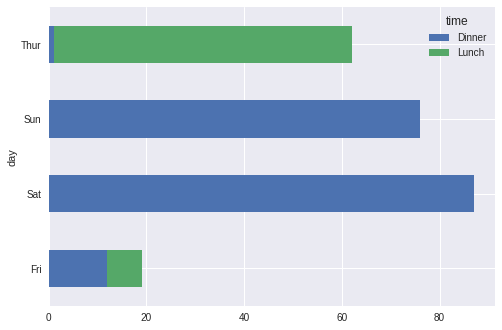

In [12]:
def answer_11():
    # write your code here
    ax1=pd.crosstab(data_tips.smoker,data_tips.sex).plot.barh(stacked=True)
    ax2=pd.crosstab(data_tips.day,data_tips.time).plot.barh(stacked=True)

    return ax1,ax2
answer_11()

### Question 12

Who pay mostly the bills ? men or women ? and when ? Try to visualise the conditional distributions
of Sex given the day of the week, with a mosaic plot

(<matplotlib.figure.Figure at 0x7fed048d2048>,
 OrderedDict([(('Sun', 'Female'),
               (0.0, 0.0, 0.3068723249616409, 0.2360552544151075)),
              (('Sun', 'Male'),
               (0.0,
                0.23937751355132011,
                0.3068723249616409,
                0.7606224864486798)),
              (('Sat', 'Female'),
               (0.3117984333360252,
                0.0,
                0.35128805620608894,
                0.32076984763432237)),
              (('Sat', 'Male'),
               (0.3117984333360252,
                0.32409210677053502,
                0.35128805620608894,
                0.67590789322946487)),
              (('Thur', 'Female'),
               (0.6680125979164984,
                0.0,
                0.250343212468707,
                0.51441431786518055)),
              (('Thur', 'Male'),
               (0.6680125979164984,
                0.51773657700139308,
                0.250343212468707,
                0.48226342299860

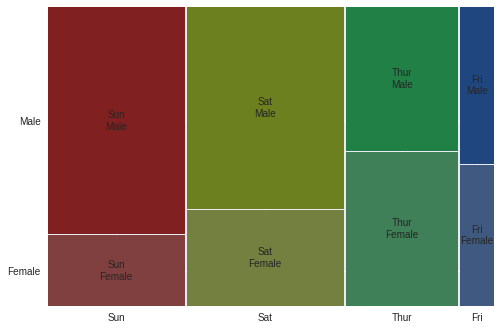

In [13]:
from statsmodels.graphics.mosaicplot import mosaic
def answer_12():
    ax=mosaic(data_tips,['day','sex'])
    
    return ax 

answer_12()
# men pay mostly and  on Sunday

In [33]:
#You can explore more nice plots  with the seaborn library: http://seaborn.pydata.org/tutorial/categorical.html

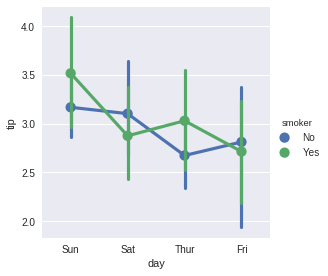

In [16]:
sns.factorplot(x="day", y="tip", hue="smoker", data=data_tips)  # estimtor is the mean among each day

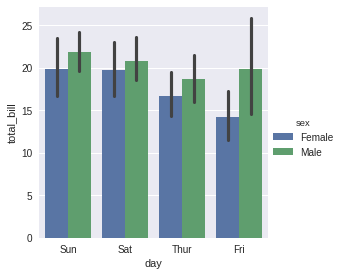

In [18]:
sns.factorplot(x="day", y="total_bill", hue="sex", data=data_tips, kind="bar")

In [20]:
# the plot above shows that Male pay mostly the bills, especially on Sunday

## Regression

In [22]:
# importing statsmodels
import statsmodels.formula.api as sm

### Question 13

Before starting with the regression, we will learn how to build dummy variables, which is sometimes
useful. Create four new variables, named day_Thur, day_Fri, day_Sat, day_Sun, that take 1 if the dining party
was held on that day, 0 otherwise.

In [27]:
#this function should return a dataframe including the dummies for 'day'
def answer_13():
    # write your code here:
    data_tips=answer_4()
    return pd.get_dummies(data_tips,columns=['day'])
answer_13().head(2)


,total_bill,tip,sex,smoker,time,size,tip_rate,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,Female,No,Dinner,2,0.059447,0,0,1,0
1,10.34,1.66,Male,No,Dinner,3,0.160542,0,0,1,0


### Question 14

Fit a general linear model with tip rate as a response variable against all the other variables of
interest : sex, smoker, time, size, day_Thur, day_Fri, day_Sat, day_Sun

In [30]:
# this function should fit a general model respecting the requirements and return a summary about that model
#( use :  your_model.summary())
def answer_14():
    answer_13()
    model=sm.ols(formula="answer_13().tip_rate~answer_13().sex + answer_13().smoker +answer_13().time + answer_13()['size'] + answer_13().day_Fri + answer_13().day_Thur + answer_13().day_Sun + answer_13().day_Sat ",data=answer_13()).fit()
    return model.summary()
answer_14()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     answer_13().tip_rate   R-squared:                       0.042
Model:                              OLS   Adj. R-squared:                  0.014
Method:                   Least Squares   F-statistic:                     1.479
Date:                  Tue, 18 Jul 2017   Prob (F-statistic):              0.175
Time:                          13:44:42   Log-Likelihood:                 341.67
No. Observations:                   244   AIC:                            -667.3
Df Residuals:                       236   BIC:                            -639.4
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     0.1459      0.013     11.554      0.000         0.121     0.171
answer_13().sex[T.Male]      -0.0085      0.008     -1.023      0.307        -0.025     0.008
answer_13().smoker[T.Yes]     0.0036      0.008      0.428      0.669        -0.013     0.020
answer_13().time[T.Lunch]     0.0234      0.026      0.895      0.372        -0.028     0.075
answer_13()['size']          -0.0096      0.004     -2.282      0.023        -0.018    -0.001
answer_13().day_Fri           0.0373      0.012      3.049      0.003         0.013     0.061
answer_13().day_Thur          0.0191      0.020      0.953      0.341        -0.020     0.059
answer_13().day_Sun           0.0540      0.010      5.160      0.000         0.033     0.075
answer_13().day_Sat           0.0355      0.010      3.590      0.000         0.016     0.055
==============================================================================
Omnibus:                      214.408   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7088.439
Skew:                           3.189   Prob(JB):                         0.00
Kurtosis:                      28.623   Cond. No.                     8.72e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.97e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Question 15

Fit a model with only the size as an explanatory variable

In [32]:
def answer_15():
    #write your code here
    data_tips=answer_13()
    model=sm.ols(formula="data_tips.tip_rate~data_tips['size']",data=data_tips).fit()    
    return model.summary()

answer_15()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     data_tips.tip_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.042
Date:                Tue, 18 Jul 2017   Prob (F-statistic):             0.0256
Time:                        13:47:08   Log-Likelihood:                 338.95
No. Observations:                 244   AIC:                            -673.9
Df Residuals:                     242   BIC:                            -666.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.1844      0.011     16.475      0.000         0.162     0.206
data_tips['size']    -0.0092      0.004     -2.245      0.026        -0.017    -0.001
==============================================================================
Omnibus:                      220.122   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7618.220
Skew:                           3.308   Prob(JB):                         0.00
Kurtosis:                      29.562   Cond. No.                         8.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 16

Use a stepwise algorithm with the AIC statistic as a variable selection process to select a good
model. Start from the full model of question 13. What do you remark?

In [34]:
# this function is provided since there is no specific method for aicstatistic in python
# the source code was taken from : http://planspace.org/20150423-forward_selection_with_statsmodels/
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} ".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} ".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [35]:
def answer_16():
    data=answer_13().iloc[:,2:10]
    model = forward_selected(data, 'tip_rate')
    return  model.model.formula ,model.rsquared_adj
answer_16()

('tip_rate ~ size + day_Sat ', 0.022243088905636199)

#### Home work

Explore the notion of interaction between the Gender and the smoking habit by including
explicitely this interaction into a model with size, sex, smoke

### Question 17

Check the linear relationship between the tip and the total bill, seen at question 7, with a linear
model and interpret the quality of this model

In [37]:

def answer_17():
    # write your code here
    model=sm.ols(formula="data_tips.tip_rate~data_tips.total_bill",data=data_tips).fit()
    return model.summary()
answer_17()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     data_tips.tip_rate   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.34
Date:                Tue, 18 Jul 2017   Prob (F-statistic):           5.85e-08
Time:                        13:54:37   Log-Likelihood:                 351.29
No. Observations:                 244   AIC:                            -698.6
Df Residuals:                     242   BIC:                            -691.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.2068      0.009     22.975      0.000         0.189     0.224
data_tips.total_bill    -0.0023      0.000     -5.599      0.000        -0.003    -0.002
==============================================================================
Omnibus:                      224.802   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7863.442
Skew:                           3.420   Prob(JB):                         0.00
Kurtosis:                      29.957   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""